
... ***CURRENTLY UNDER DEVELOPMENT*** ...


## Synthetic simulation of historical TCs parameters using Gaussian copulas (Rueda et al. 2016) and subsequent selection of representative cases using Maximum Dissimilarity (MaxDiss) algorithm (Camus et al. 2011)

inputs required: 
  * Historical TC parameters that affect the site (output of *notebook 05*)
  * number of synthetic simulations to run
  * number of representative cases to be selected using MaxDiss

in this notebook:
  * synthetic generation of TCs tracks based on gaussian copulas of the TC parameters
  * MDA selection of representative number of events

In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

# common
import os
import os.path as op

# pip
import xarray as xr
import numpy as np

# DEV: override installed teslakit
import sys
sys.path.insert(0, op.join(os.path.abspath(''), '..', '..', '..'))

# teslakit
from teslakit.database import Database
from teslakit.statistical import CopulaSimulation
from teslakit.mda import MaxDiss_Simplified_NoThreshold

from teslakit.plotting.storms import Plot_TCs_Params_MDAvsSIM, \
Plot_TCs_Params_HISTvsSIM, Plot_TCs_Params_HISTvsSIM_histogram


## Database and Site parameters

In [4]:
# --------------------------------------
# Teslakit database

p_data = r'/media/administrador/HD/Dropbox/Guam/teslakit/data'
# p_data=r'/Users/laurac/Dropbox/Guam/teslakit/data'
db = Database(p_data)

# set site
db.SetSite('GUAM')



In [5]:
# --------------------------------------
# load data and set parameters

_, TCs_r2_params = db.Load_TCs_r2_hist()  # TCs parameters inside radius 2

# TCs random generation and MDA parameters
num_sim_rnd = 100000
num_sel_mda = 1000


In [24]:
TCs, TCs_r2_params = db.Load_TCs_r2_hist() 

In [25]:
TCs

<xarray.Dataset>
Dimensions:           (date_time: 360, quadrant: 4, storm: 426)
Coordinates:
    time              (storm, date_time) datetime64[ns] ...
    lat               (storm, date_time) float32 ...
    lon               (storm, date_time) float32 ...
  * storm             (storm) int64 5442 5474 5479 5487 ... 13211 13221 13230
Dimensions without coordinates: date_time, quadrant
Data variables:
    numobs            (storm) float32 ...
    sid               (storm) |S13 ...
    season            (storm) float32 ...
    number            (storm) int16 ...
    basin             (storm, date_time) |S2 ...
    subbasin          (storm, date_time) |S2 ...
    name              (storm) |S128 ...
    source_usa        (storm) |S128 ...
    source_jma        (storm) |S128 ...
    source_cma        (storm) |S128 ...
    source_hko        (storm) |S128 ...
    source_new        (storm) |S128 ...
    source_reu        (storm) |S128 ...
    source_bom        (storm) |S128 ...
    source_nad        (storm) |S128 ...
    source_wel        (storm) |S128 ...
    source_td5        (storm) |S128 ...
    source_td6        (storm) |S128 ...
    source_ds8        (storm) |S128 ...
    source_neu        (storm) |S128 ...
    source_mlc        (storm) |S128 ...
    iso_time          (storm, date_time) |S19 ...
    nature            (storm, date_time) |S2 ...
    wmo_wind          (storm, date_time) float32 ...
    wmo_pres          (storm, date_time) float32 ...
    wmo_agency        (storm, date_time) |S19 ...
    track_type        (storm) |S19 ...
    main_track_sid    (storm) |S13 ...
    dist2land         (storm, date_time) float32 ...
    landfall          (storm, date_time) float32 ...
    iflag             (storm, date_time) |S14 ...
    usa_agency        (storm, date_time) |S32 ...
    usa_atcf_id       (storm, date_time) |S32 ...
    usa_lat           (storm, date_time) float32 ...
    usa_lon           (storm, date_time) float32 ...
    usa_record        (storm, date_time) |S1 ...
    usa_status        (storm, date_time) |S2 ...
    usa_wind          (storm, date_time) float32 ...
    usa_pres          (storm, date_time) float32 ...
    usa_sshs          (storm, date_time) float32 ...
    usa_r34           (storm, date_time, quadrant) float32 ...
    usa_r50           (storm, date_time, quadrant) float32 ...
    usa_r64           (storm, date_time, quadrant) float32 ...
    usa_poci          (storm, date_time) float32 ...
    usa_roci          (storm, date_time) float32 ...
    usa_rmw           (storm, date_time) float32 ...
    usa_eye           (storm, date_time) float32 ...
    tokyo_lat         (storm, date_time) float32 ...
    tokyo_lon         (storm, date_time) float32 ...
    tokyo_grade       (storm, date_time) float32 ...
    tokyo_wind        (storm, date_time) float32 ...
    tokyo_pres        (storm, date_time) float32 ...
    tokyo_r50_dir     (storm, date_time) float32 ...
    tokyo_r50_long    (storm, date_time) float32 ...
    tokyo_r50_short   (storm, date_time) float32 ...
    tokyo_r30_dir     (storm, date_time) float32 ...
    tokyo_r30_long    (storm, date_time) float32 ...
    tokyo_r30_short   (storm, date_time) float32 ...
    tokyo_land        (storm, date_time) float32 ...
    cma_lat           (storm, date_time) float32 ...
    cma_lon           (storm, date_time) float32 ...
    cma_cat           (storm, date_time) float32 ...
    cma_wind          (storm, date_time) float32 ...
    cma_pres          (storm, date_time) float32 ...
    hko_lat           (storm, date_time) float32 ...
    hko_lon           (storm, date_time) float32 ...
    hko_cat           (storm, date_time) |S6 ...
    hko_wind          (storm, date_time) float32 ...
    hko_pres          (storm, date_time) float32 ...
    newdelhi_lat      (storm, date_time) float32 ...
    newdelhi_lon      (storm, date_time) float32 ...
    newdelhi_grade    (storm, date_time) |S10 ...
    newdelhi_wind     (storm, date_time) float32 ...
    newde

In [18]:
TCs_r2_params

<xarray.Dataset>
Dimensions:        (storm: 426)
Coordinates:
  * storm          (storm) int64 5442 5474 5479 5487 ... 13204 13211 13221 13230
Data variables:
    pressure_min   (storm) float32 980.0 979.0 1002.0 ... 998.0 996.0 900.0
    pressure_mean  (storm) float32 993.0 982.44446 1004.4 ... 1000.5 912.8571
    velocity_mean  (storm) float64 14.12 16.55 15.88 19.84 ... 18.49 33.89 19.31
    gamma          (storm) float64 145.1 109.7 110.6 121.4 ... 123.7 110.9 118.0
    delta          (storm) float64 160.8 130.6 141.8 172.9 ... 123.7 140.7 98.05
    category       (storm) int64 1 2 0 0 1 2 0 1 1 0 3 ... 0 1 0 0 3 0 1 4 1 1 5
    dmin_date      (storm) datetime64[ns] 1951-04-17T06:00:00 ... 2018-10-24T...
    last_date      (storm) datetime64[ns] 1951-04-23T18:00:00 ... 2018-11-03T...
    index_in       (storm) int64 11 0 0 7 0 7 14 6 9 0 ... 18 8 2 0 0 27 0 9 25
    index_out      (storm) int64 32 17 8 15 10 12 26 20 ... 24 4 9 36 12 16 38
Attributes:
    point_lon:  144.75
    point_lat:  13.44
    point_r:    4
    source:     teslakit_v0.9.1

In [35]:
TCs_r2_params.dmin_date[350]
TCs_r2_params.pressure_min[350]

<xarray.DataArray 'pressure_min' ()>
array(940., dtype=float32)
Coordinates:
    storm    int64 11615
Attributes:
    units:       mb
    short_name:  prs_min
    long_name:   storm track minimum central pressure


## Historical TCs - Probabilistic Simulation

In [4]:
# --------------------------------------
# Probabilistic simulation Historical TCs

# aux functions
def adjust_to_pareto(var):
    'Fix data. It needs to start at 0 for Pareto adjustment '
    var = var.astype(float)
    var_pareto =  np.amax(var) - var + 0.00001
    return var_pareto

def adjust_from_pareto(var_base, var_pareto):
    'Returns data from pareto adjustment'
    var = np.amax(var_base) - var_pareto + 0.00001
    return var


# use small radius parameters (4º)
pmean = TCs_r2_params.pressure_mean.values[:]
pmin = TCs_r2_params.pressure_min.values[:]
gamma = TCs_r2_params.gamma.values[:]
delta = TCs_r2_params.delta.values[:]
vmean = TCs_r2_params.velocity_mean.values[:]

# fix pressure for p
pmean_p = adjust_to_pareto(pmean)
pmin_p = adjust_to_pareto(pmin)

# join storm parameters for copula simulation
storm_params = np.column_stack(
    (pmean_p, pmin_p, gamma, delta, vmean)
)

# statistical simulate PCs using copulas 
kernels = ['GPareto', 'GPareto', 'ECDF', 'ECDF', 'ECDF']
storm_params_sim = CopulaSimulation(storm_params, kernels, num_sim_rnd)

# adjust back pressures from pareto
pmean_sim = adjust_from_pareto(pmean, storm_params_sim[:,0])
pmin_sim = adjust_from_pareto(pmin, storm_params_sim[:,1])

# store simulated storms - parameters 
TCs_r2_sim_params = xr.Dataset(
    {
        'pressure_mean':(('storm'), pmean_sim),
        'pressure_min':(('storm'), pmin_sim),
        'gamma':(('storm'), storm_params_sim[:,2]),
        'delta':(('storm'), storm_params_sim[:,3]),
        'velocity_mean':(('storm'), storm_params_sim[:,4]),
    },
    coords = {
        'storm':(('storm'), np.arange(num_sim_rnd))    
    },
)
print(TCs_r2_sim_params)

TCs_r2_sim_params=TCs_r2_sim_params.isel(storm=np.where(TCs_r2_sim_params.pressure_min>840)[0])

# db.Save_TCs_r2_sim_params(TCs_r2_sim_params)


<xarray.Dataset>
Dimensions:        (storm: 100000)
Coordinates:
  * storm          (storm) int64 0 1 2 3 4 5 ... 99995 99996 99997 99998 99999
Data variables:
    pressure_mean  (storm) float64 1.003e+03 992.5 936.7 ... 990.6 1.002e+03
    pressure_min   (storm) float64 985.9 983.7 934.6 ... 1.005e+03 972.3 992.9
    gamma          (storm) float64 105.1 195.3 84.67 190.2 ... 132.3 112.7 116.6
    delta          (storm) float64 97.51 133.8 86.54 282.9 ... 143.2 123.6 84.38
    velocity_mean  (storm) float64 21.41 22.01 16.36 22.01 ... 13.81 13.61 14.41


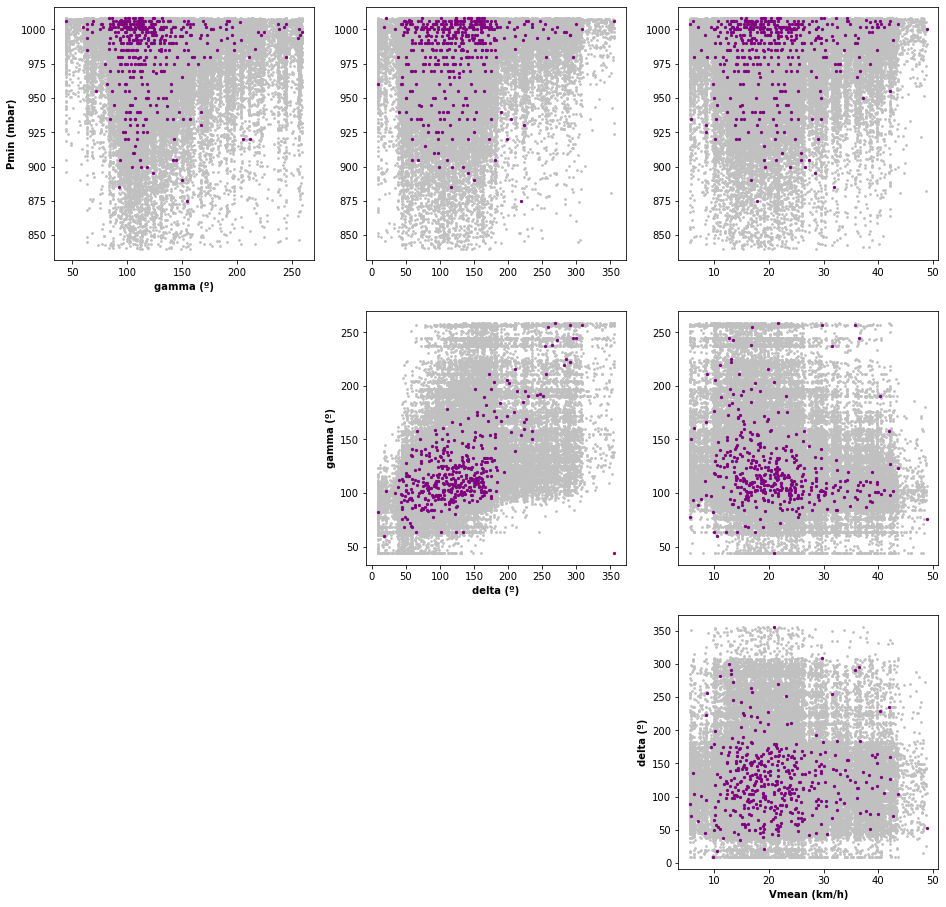

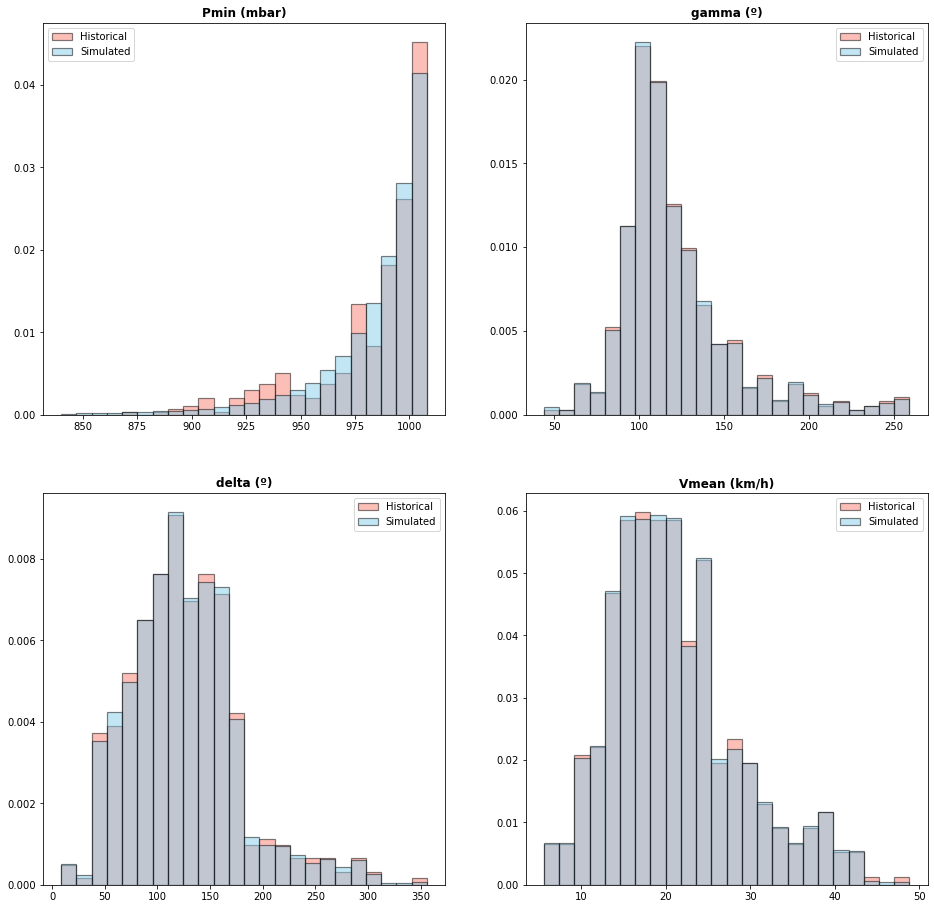

In [5]:
# Historical vs Simulated: scatter plot parameters
Plot_TCs_Params_HISTvsSIM(TCs_r2_params, TCs_r2_sim_params);

# Historical vs Simulated: histogram parameters
Plot_TCs_Params_HISTvsSIM_histogram(TCs_r2_params, TCs_r2_sim_params);



## Simulated TCs - MaxDiss classification

In [6]:
# --------------------------------------
# MaxDiss classification

# get simulated parameters  
pmean_s = TCs_r2_sim_params.pressure_mean.values[:]
pmin_s  = TCs_r2_sim_params.pressure_min.values[:]
gamma_s = TCs_r2_sim_params.gamma.values[:]
delta_s = TCs_r2_sim_params.delta.values[:]
vmean_s = TCs_r2_sim_params.velocity_mean.values[:]

# subset, scalar and directional indexes
data_mda = np.column_stack((pmean_s, pmin_s, vmean_s, delta_s, gamma_s))
ix_scalar = [0,1,2]
ix_directional = [3,4]

centroids = MaxDiss_Simplified_NoThreshold(
    data_mda, num_sel_mda, ix_scalar, ix_directional 
)


# store MDA storms - parameters 
TCs_r2_MDA_params = xr.Dataset(
    {
        'pressure_mean':(('storm'), centroids[:,0]),
        'pressure_min':(('storm'), centroids[:,1]),
        'velocity_mean':(('storm'), centroids[:,2]),
        'delta':(('storm'), centroids[:,3]),
        'gamma':(('storm'), centroids[:,4]),
    },
    coords = {
        'storm':(('storm'), np.arange(num_sel_mda))    
    },
)
print(TCs_r2_MDA_params)

#db.Save_TCs_r2_mda_params(TCs_r2_MDA_params)


MaxDiss waves parameters: 99395 --> 1000

   MDA centroids: 1000/1000

<xarray.Dataset>
Dimensions:        (storm: 1000)
Coordinates:
  * storm          (storm) int64 0 1 2 3 4 5 6 7 ... 993 994 995 996 997 998 999
Data variables:
    pressure_mean  (storm) float64 1.009e+03 704.3 1.009e+03 ... 923.6 955.2
    pressure_min   (storm) float64 1.008e+03 864.1 1.008e+03 ... 963.3 919.6
    velocity_mean  (storm) float64 17.72 42.22 46.09 38.91 ... 20.9 35.98 36.66
    delta          (storm) float64 234.7 93.46 49.62 305.9 ... 154.1 281.4 83.11
    gamma          (storm) float64 161.2 110.7 43.89 256.7 ... 75.62 146.7 175.7


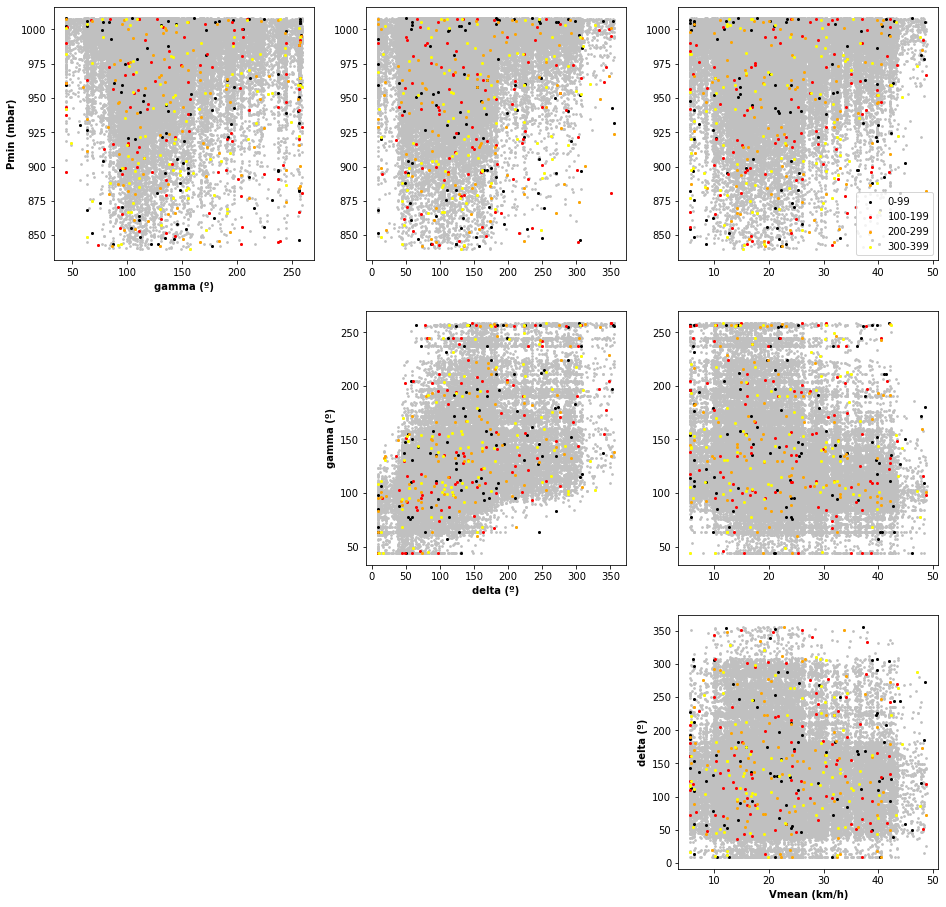

In [7]:
# Historical vs Simulated: scatter plot parameters
Plot_TCs_Params_MDAvsSIM(TCs_r2_MDA_params, TCs_r2_sim_params);


## Historical TCs (MDA centroids) Waves Simulation

Waves data is generated by numerically simulating selected storms. 

This methodology is not included inside teslakit python library.

This step needs to be done before continuing with notebook 07
